<a href="https://colab.research.google.com/github/Hossain-Younis/CreditGuard/blob/main/CreditGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay
import joblib

Pre-processing Datasets

In [2]:
# Function for preprocessing
def preprocess_rejected(chunk):
    columns = ['loan_amnt', 'int_rate', 'emp_length', 'purpose', 'addr_state', 'dti', 'accepted']

# Specifying file paths
accepted_path = "/content/drive/MyDrive/Colab Notebooks/CreditGuard/Dataset/accepted_2007_to_2018Q4.csv"

# Defining chunk size for accepted data
accepted_chunk_size = 10000

# Initializing empty lists to store training and testing data
X_accepted_list, y_accepted_list = [], []

# Reading and processing the accepted data in chunks
accepted_common_columns = ['loan_amnt', 'int_rate', 'emp_length', 'purpose', 'addr_state', 'dti']
for chunk in pd.read_csv(accepted_path, usecols=accepted_common_columns, chunksize=accepted_chunk_size, low_memory=False):
    chunk['accepted'] = 1
    X_accepted_list.append(chunk.drop(columns=['accepted']).values)
    y_accepted_list.append(chunk['accepted'].values)

# Combining the processed chunks into a single set of training and testing arrays
X_accepted = np.concatenate(X_accepted_list, axis=0)
y_accepted = np.concatenate(y_accepted_list)

# Splitting into training and testing sets for accepted data
X_train_accepted, X_test_accepted, y_train_accepted, y_test_accepted = train_test_split(X_accepted, y_accepted, test_size=0.2, random_state=42)

# Saving the training and testing numpy arrays for accepted data
np.save("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_features_accepted.npy", X_train_accepted)
np.save("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_labels_accepted.npy", y_train_accepted)
np.save("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_features_accepted.npy", X_test_accepted)
np.save("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_labels_accepted.npy", y_test_accepted)

Data Exploration

In [3]:
# Loading the training features and labels for accepted data
X_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_features_accepted.npy", allow_pickle=True)
y_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_labels_accepted.npy", allow_pickle=True)

# Displaying the first few rows of the combined dataset
accepted_df = pd.DataFrame({'loan_amnt': X_train_accepted[:, 0], 'int_rate': X_train_accepted[:, 1], 'emp_length': X_train_accepted[:, 2],
                             'purpose': X_train_accepted[:, 3], 'addr_state': X_train_accepted[:, 4], 'dti': X_train_accepted[:, 5],
                             'accepted': y_train_accepted})
print(accepted_df.head())

  loan_amnt int_rate emp_length             purpose addr_state    dti  \
0   13000.0    14.33    5 years  debt_consolidation         PA  15.87   
1    1000.0    14.31   < 1 year               other         SC  36.25   
2   32000.0    16.01  10+ years  debt_consolidation         GA  18.94   
3   21000.0     6.39    4 years         credit_card         PA  16.58   
4   12000.0    12.99    2 years  debt_consolidation         IN   5.87   

   accepted  
0         1  
1         1  
2         1  
3         1  
4         1  


In [4]:
# Loading the training features and labels for accepted data
X_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_features_accepted.npy", allow_pickle=True)
y_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_labels_accepted.npy", allow_pickle=True)

# Displaying the summary statistics of the combined dataset
accepted_df = pd.DataFrame({'loan_amnt': X_train_accepted[:, 0], 'int_rate': X_train_accepted[:, 1], 'emp_length': X_train_accepted[:, 2],
                             'purpose': X_train_accepted[:, 3], 'addr_state': X_train_accepted[:, 4], 'dti': X_train_accepted[:, 5],
                             'accepted': y_train_accepted})
print(accepted_df.describe())

        accepted
count  1808560.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0


Visualizing Datasets

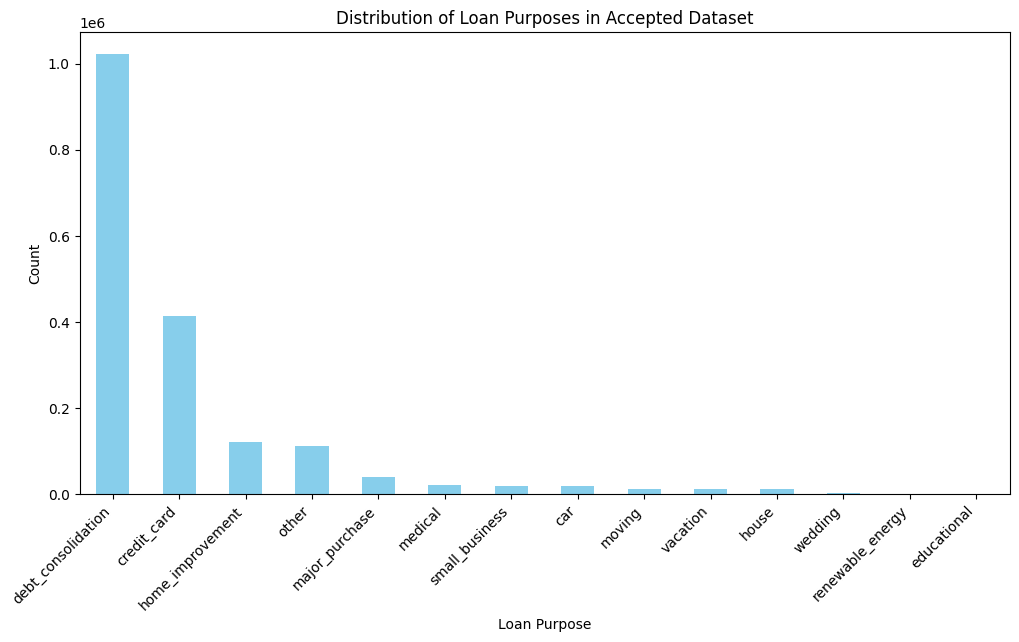

In [5]:
# Loading the training features
X_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_features_accepted.npy", allow_pickle=True)

# Creating a DataFrame for better manipulation
accepted_df = pd.DataFrame(data=X_train_accepted, columns=['loan_amnt', 'int_rate', 'emp_length', 'purpose', 'addr_state', 'dti'])

# Counting the occurrences of each loan purpose
purpose_counts = accepted_df['purpose'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Purposes in Accepted Dataset')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Model Declaration and Training of the model

In [6]:
# Defining the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

Fitting the model with the trainning datasets

In [7]:
# Load training features and labels
X_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_features_accepted.npy", allow_pickle=True)
y_train_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Train_labels_accepted.npy", allow_pickle=True)

# Applying label encoding for 'emp_length' feature
label_encoder_emp_length = LabelEncoder()
X_train_accepted[:, 2] = label_encoder_emp_length.fit_transform(X_train_accepted[:, 2])

# Applying label encoding for 'purpose' feature
label_encoder_purpose = LabelEncoder()
X_train_accepted[:, 3] = label_encoder_purpose.fit_transform(X_train_accepted[:, 3])

# Applying label encoding for 'addr_state' feature
label_encoder_addr_state = LabelEncoder()
X_train_accepted[:, 4] = label_encoder_addr_state.fit_transform(X_train_accepted[:, 4])

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X_train_accepted_imputed = imputer.fit_transform(X_train_accepted)

# Fitting the model with training data for accepted data
model.fit(X_train_accepted_imputed, y_train_accepted)

RandomForestClassifier(random_state=42)

Testing the accuracy of the model and Visualizing the accuracy

In [8]:
# Loading the testing features and labels
X_test_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_features_accepted.npy", allow_pickle=True)
y_test_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_labels_accepted.npy", allow_pickle=True)

# Applying label encoding for 'emp_length' feature
X_test_accepted[:, 2] = label_encoder_emp_length.transform(X_test_accepted[:, 2])

# Applying label encoding for 'purpose' feature
X_test_accepted[:, 3] = label_encoder_purpose.transform(X_test_accepted[:, 3])

# Applying label encoding for 'addr_state' feature
X_test_accepted[:, 4] = label_encoder_addr_state.transform(X_test_accepted[:, 4])

# Handling missing values
X_test_accepted_imputed = imputer.transform(X_test_accepted)

# Checking the performannce of the model using the score() method
acc_score_accepted = model.score(X_test_accepted_imputed, y_test_accepted)
print("Accepted Test Data Score Method Accuracy: ", acc_score_accepted)

# Making predictions on the accepted test dataset
y_pred_accepted = model.predict(X_test_accepted_imputed)

# Calculating the accuracy on accepted test data using the predict() method
accuracy_predict_accepted = accuracy_score(y_test_accepted, y_pred_accepted)
print("Accepted Test Data Predict Method Accuracy: ", accuracy_predict_accepted)

Accepted Test Data Score Method Accuracy:  1.0
Accepted Test Data Predict Method Accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


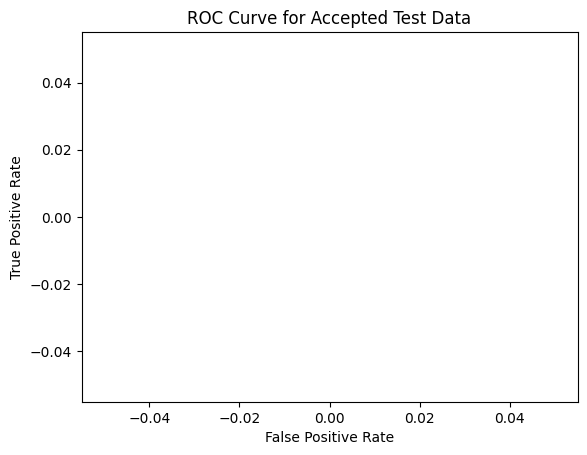

In [9]:
# Loading the testing features and labels
X_test_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_features_accepted.npy", allow_pickle=True)
y_test_accepted = np.load("/content/drive/MyDrive/Colab Notebooks/CreditGuard/Test_labels_accepted.npy", allow_pickle=True)

# Applying label encoding for 'emp_length' feature
X_test_accepted[:, 2] = label_encoder_emp_length.transform(X_test_accepted[:, 2])

# Applying label encoding for 'purpose' feature
X_test_accepted[:, 3] = label_encoder_purpose.transform(X_test_accepted[:, 3])

# Applying label encoding for 'addr_state' feature
X_test_accepted[:, 4] = label_encoder_addr_state.transform(X_test_accepted[:, 4])

# Handling missing values
X_test_accepted_imputed = imputer.transform(X_test_accepted)

# Generating ROC curve data for accepted test data
fpr_accepted, tpr_accepted, _ = roc_curve(y_test_accepted, model.predict_proba(X_test_accepted_imputed)[:, 0])

# Displaying ROC curve for accepted test data
roc_display_accepted = RocCurveDisplay(fpr=fpr_accepted, tpr=tpr_accepted)
roc_display_accepted.plot()

plt.title('ROC Curve for Accepted Test Data')
plt.show()

Saving the trained model

In [10]:
# Specifying the saving path
path = "/content/drive/MyDrive/Colab Notebooks/CreditGuard/CreditGuard.joblib"

# Saving the model
joblib.dump(model, path)

['/content/drive/MyDrive/Colab Notebooks/CreditGuard/CreditGuard.joblib']